In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
df=pd.read_csv("D:/Machine Learning/heart_cleveland.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
df.shape

(297, 14)

In [7]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

## Data Preprocessing
No need for OneHotEncoding since all values are numeric

In [10]:
X=df.drop('condition',axis='columns')
y=df.condition

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [14]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [16]:
print(y_train.value_counts())

condition
0    128
1    109
Name: count, dtype: int64


## RandomForest

In [19]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
y_pred=rf.predict(X_test)

In [23]:
rf.predict(X_test[[7]])

array([1], dtype=int64)

In [25]:
y_test.iloc[7]

0

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        32
           1       0.95      0.71      0.82        28

    accuracy                           0.85        60
   macro avg       0.87      0.84      0.84        60
weighted avg       0.87      0.85      0.85        60



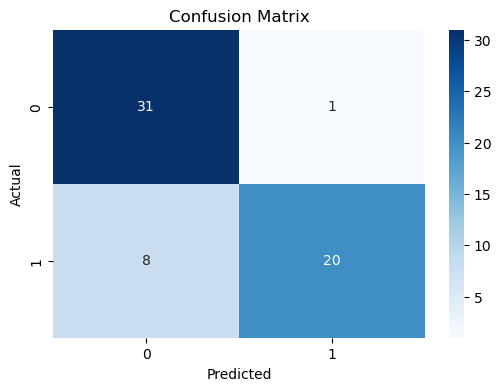

In [29]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
print(accuracy_score(y_test,y_pred))

0.85


## LogisticRegression

In [34]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred=lr.predict(X_test)

In [38]:
lr.predict(X_test[[7]])

array([0], dtype=int64)

In [40]:
y_test.iloc[7]

0

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60



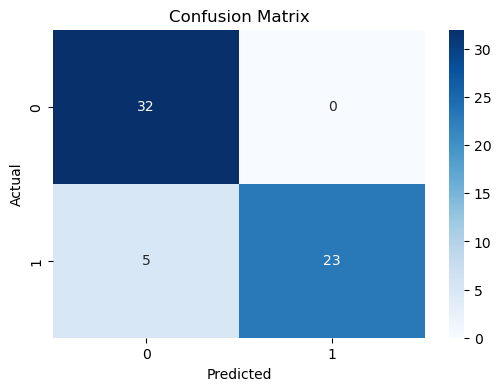

In [44]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [46]:
print(accuracy_score(y_test,y_pred))

0.9166666666666666


## SVM

In [49]:
param_grid={'C':[0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1],'kernel':['rbf']}

grid=GridSearchCV(SVC(),param_grid, cv=5)
grid.fit(X_train,y_train)

print("Best C:",grid.best_params_['C'])
print("Best gamma:",grid.best_params_['gamma'])
print("Best score:",grid.best_score_)

Best C: 0.1
Best gamma: 0.1
Best score: 0.8273936170212766


In [51]:
sv=SVC(C=0.1,gamma=0.1,kernel='rbf')
sv.fit(X_train,y_train)

SVC(C=0.1, gamma=0.1)

In [53]:
y_pred=sv.predict(X_test)

In [55]:
sv.predict(X_test[[7]])

array([0], dtype=int64)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        32
           1       1.00      0.71      0.83        28

    accuracy                           0.87        60
   macro avg       0.90      0.86      0.86        60
weighted avg       0.89      0.87      0.86        60



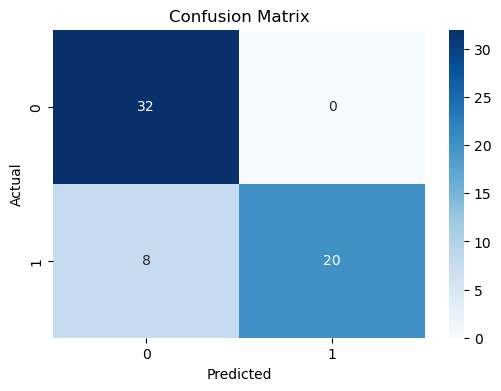

In [61]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Logistic Regression	0.92 
- Works well when classes are linearly separable
- Fast and interpretable

Support Vector Machine 0.87
- Good performance after tuning C and gamma
- Captures complex boundaries
- Sensitive to scale
  
Random Forest Classifier 0.85
- Robust to outliers
- Handles feature interactions well
- May underperform on low-variance or small datasets